<a href="https://colab.research.google.com/github/sareenv/304CEM-Authentication/blob/master/Measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required Libraries

In [ ]:
!pip install forex_python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 130 kB 10.2 MB/s 


In [ ]:
# from forex_python.converter import CurrencyRates
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import requests
from IPython.display import display # to dispay the contents of the data frames.


from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/MEASUREMENT-PROJECT/DATA")



# splits the data into the three seperate files.
df_restuarant = pd.read_csv('test.csv')
split_one = df_restuarant.iloc[:2198, :]
split_two = df_restuarant.iloc[2199: 4396, :]
split_three = df_restuarant.iloc[4396: , :]
split_one.reset_index()
split_two.reset_index()
split_three.reset_index()

split_one.to_csv("./file_one.csv")
split_two.to_csv("./file_two.csv")
split_three.to_csv("./file_three.csv")


# read the three splitted part of the dataframe. 
df_timeone = pd.read_csv('./file_one.csv')
df_timetwo = pd.read_csv('./file_two.csv')
df_timethree = pd.read_csv('./file_three.csv')

Mounted at /content/drive


In [ ]:
def calculate_compliance(df):
  null_count = df[df.isna().any(axis=1)]
  complient_count = df[df.Currency != 'EUR']
  merged_df = pd.merge(null_count, complient_count,how="outer")
  return merged_df.shape[0]/df.shape[0]

  
def validity_calculation(df):
  # credibility and compliance. 
  weight_credibility = 0.5
  weight_compliance = 0.5
  credibility = 0.66 # one time frame is not crediable 
  compliance = calculate_compliance(df)
  validitity = compliance * weight_compliance + weight_credibility * credibility
  return validitity

# returns the count of the records which lies in the some sort of acceptable range.
def getRecordsCntWithinRange(df, low, high):
  
  return 800


def varicity_calculation(df):
  # availability. 
  availablity = 1 # since the availablity of the system is computed based on the no of succ_Req / total Req.
  # currentness
  low_range_value = 0
  high_range_value = 100
  currentness_acceptable_range = (low_range_value, high_range_value)
  acceptable_cnt = getRecordsCntWithinRange(df, currentness_acceptable_range[0], 
                                            currentness_acceptable_range[1])
  lbd = df.shape[0]
  currentness = acceptable_cnt / lbd
  # accuracy. 
  summed_value = 0 # this needs to be calculated as the accumalated sum.
  h_acc = math.log2(lbd) - (1/lbd * summed_value) # entropy of the multi-datasets.
  h_max = math.log2(lbd)
  accuracy = h_acc / h_max
   
  # completeness.
  non_null_records = 0 # needs to be calculated
  completeness = non_null_records / lbd
  
  # veracity calculation.
  weight_completeness = 0.4
  weight_accuracy = 0.25
  weight_availability = 0.05
  weight_currentness = 0.3
  varicity = weight_accuracy * accuracy + weight_completeness * completeness + weight_currentness * currentness + weight_availability * availablity
  return varicity


def get_tracable_records(df):
  return 0


# tracibility_values = [(200, 300)]
def vincularity_calculation(df, tracibility_values, nds_count):
  tracibility_sum = 0
  for trace_val in tracibility_values:
    trace_records = trace_val[0]
    ldst = trace_val[1]
    tracibility_sum += trace_records / ldst
  return tracibility_sum / nds_count

# data-extraction phase.
validity_one = validity_calculation(df_timeone)
validity_two = validity_calculation(df_timetwo)
validity_three = validity_calculation(df_timethree)

# -----------------------------------------------
# Adding the record's age since, 
# there exists no age attribute in the datasets  
# provided to our team.
# -----------------------------------------------

split_one['recordAge'] = np.random.randint(1, 60, split_one.shape[0])
split_two['recordAge'] = np.random.randint(1, 60, split_two.shape[0])
split_three['recordAge'] = np.random.randint(1, 60, split_three.shape[0])

split_one.to_csv("./file_one.csv")
split_two.to_csv("./file_two.csv")
split_three.to_csv("./file_three.csv")


# -----------------------------
# After the pre-procesing phase.
# -----------------------------



















































NameError: ignored

In [ ]:
df_restuarant = pd.read_csv('test.csv')

In [ ]:
original_size = df_restuarant.shape[0]
print("The original value of the dataset is {}".format(original_size))

The original value of the dataset is 6596


In [ ]:
df_modified = df_restuarant.drop(["PhoneNumber"], axis=1)
df_modified = df_modified.drop(["Url"], axis=1)
df_modified = df_modified.drop(["WebsiteUrl"], axis=1)

In [ ]:
df_modified["Cuisine"] = df_modified["Cuisine"].str.split(',')
df_modified = df_modified.apply(pd.Series.explode)

In [ ]:
display(df_modified.head())

,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,Award
0,Inter Scaldes,"Zandweg 2, Kruiningen, 4416 NA, Netherlands",Kruiningen,165,380,EUR,Modern Cuisine,4.024108,51.457161,3 MICHELIN Stars
1,De Librije,"Spinhuisplein 1, Zwolle, 8011 ZZ, Netherlands",Zwolle,232,232,EUR,Modern Cuisine,6.098018,52.515364,3 MICHELIN Stars
2,Hof van Cleve,"Riemegemstraat 1, Kruishoutem, 9770, Belgium",Kruishoutem,295,410,EUR,Creative,3.509865,50.903950,3 MICHELIN Stars
3,Boury,"Rumbeeksesteenweg 300, Roeselare, 8800, Belgium",Roeselare,100,160,EUR,Creative French,3.140398,50.937447,3 MICHELIN Stars
4,Zilte,"Hanzestedenplaats 5, Antwerpen, 2000, Belgium",Antwerpen,169,330,EUR,Creative,4.404754,51.228828,3 MICHELIN Stars


In [ ]:
total_records = df_modified.shape[0]
print("Total number of records are {}".format(total_records))

Total number of records are 8353


In [ ]:
def dataSetSplitter(df_local,dates):
  df_local["ConversionDate"]=np.nan
  df_local = df_local.sample(frac=1).reset_index(drop=True)
  # splitting into multiple df
  results = np.array_split(df_local, len(dates)) 
  for index, result in enumerate(results):
    result["ConversionDate"] = pd.to_datetime(dates[index])
  return results

# date format - day/month/yyyy
df_modified = pd.concat(dataSetSplitter(df_modified,['02/02/2022', 
                                           '18/04/2022',
                                           '10/03/2022', 
                                           '20/07/2022'
                                           ])
                            )

**Divide into different datasets**

In [ ]:
result_ds = dataSetSplitter(df_modified,['02/02/2022', 
                                           '18/04/2022',
                                           '10/03/2022', 
                                           '20/07/2022'
                                           ])
for ds_index in range(0,len(result_ds)):
  name = "result-" + str(ds_index) + ".csv"
  result_ds[ds_index].to_csv(name)

In [ ]:
minPriceMissingCondition = pd.isnull(df_modified["MinPrice"])
maxPriceMissingCondition = pd.isnull(df_modified["MaxPrice"])
currencyMissingCondition = pd.isnull(df_modified["Currency"])
condition = minPriceMissingCondition | maxPriceMissingCondition | currencyMissingCondition
missing_records_df = df_modified[condition]

In [ ]:
df_modified.shape[0]

8353

In [ ]:
def completeness():
  non_missing_values = df_modified.shape[0] - missing_records_df.shape[0]
  completeness = non_missing_values / df_modified.shape[0]
  return completeness

In [ ]:
minPriceMean = df_modified[condition == False]["MinPrice"].apply(lambda x: x.replace(',', '')).apply(lambda x: float(x)).mean()
maxPriceMean = df_modified[condition == False]["MaxPrice"].apply(lambda x: x.replace(',', '')).apply(lambda x: float(x)).mean()
completeness()

0.9990422602657728

**Completeness After Preprocessing**

In [ ]:
df_modified.fillna({"MinPrice": df_modified["MinPrice"].mode()[0], 
                    "MaxPrice": df_modified["MaxPrice"].mode()[0],
                    "Currency": "EUR"
                    }, inplace = True)

In [ ]:
# fixed values after the pre-processing.
df_modified[condition]

,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,Award,ConversionDate
19,Mott St.,"1401 N. Ashland Ave., Chicago, 60622, USA",Chicago,50,50,EUR,Fusion,-87.667465,41.907110,Bib Gourmand,NaN
1742,Girl & The Goat,"809 W. Randolph St., Chicago, 60607, USA",Chicago,50,50,EUR,American,-87.647850,41.884180,Bib Gourmand,NaN
3037,Irma la Douce,"Potsdamer Straße 102, Berlin, 10785, Germany",Berlin,50,50,EUR,Modern French,13.363858,52.501403,1 MICHELIN Star,NaN
4245,Mott St.,"1401 N. Ashland Ave., Chicago, 60622, USA",Chicago,50,50,EUR,Contemporary,-87.667465,41.907110,Bib Gourmand,NaN
4844,Thai House,"254 Rose St., Danville, 94526, USA",Danville,50,50,EUR,Thai,-122.000180,37.823370,Bib Gourmand,NaN
5719,Garlic & Chives by Kristin,"9892 Westminster Blvd., Ste.311, Garden Grove,...",Garden Grove,50,50,EUR,South East Asian,-117.955380,33.759464,Bib Gourmand,NaN
6394,Garlic & Chives by Kristin,"9892 Westminster Blvd., Ste.311, Garden Grove,...",Garden Grove,50,50,EUR,Vietnamese,-117.955380,33.759464,Bib Gourmand,NaN
6853,Girl & The Goat,"809 W. Randolph St., Chicago, 60607, USA",Chicago,50,50,EUR,Contemporary,-87.647850,41.884180,Bib Gourmand,NaN


In [ ]:
minPriceMissingCondition = pd.isnull(df_modified["MinPrice"])
maxPriceMissingCondition = pd.isnull(df_modified["MaxPrice"])
currencyMissingCondition = pd.isnull(df_modified["Currency"])
condition = minPriceMissingCondition | maxPriceMissingCondition | currencyMissingCondition
missing_records_df = df_modified[condition]

In [ ]:
# after the pre-processing
completeness()

1.0

In [ ]:
df_modified.to_csv('result.csv')

**Currency Conversion**

In [ ]:
# c = CurrencyRates()
# unique_dates = df_modified["ConversionDate"].unique()
# min_pirce = df_modified["MinPrice"].values
# min_pirce_currency = df_modified["Currency"].values
# converted_minimum_values = []

# def try_convert(amount, currency):
#     success = False
#     while success == False:
#         try:
#             res = c.convert(base_cur=currency,dest_cur='EUR',amount=amount)
#         except:
#             #wait a while
#             sleep(10)
#     return res

# for price_index in range(0, len(min_pirce)):
#   processed = min_pirce[price_index].replace(",", "")
#   if(min_pirce_currency[price_index] == "EUR"):
#     continue
  
#   else:
#     converted = try_convert(int(processed), min_pirce_currency[price_index])
#     print(converted)
#     converted_minimum_values.append(converted)


In [ ]:
# converted_minimum_values
import numpy as np

In [ ]:
from matplotlib.axis import YAxis
def processData(before_veracity, scale_factor, after_pre_processing_scale_factor, title="veracity"):
  data_set = ["time_1", "time_2", "time_3", "time_4"]
  X_axis = np.arange(len(data_set))
  after_veracity = []
  after_pre_processing = []

  for val_idx in range(0, len(before_veracity)):
    n_val = before_veracity[val_idx] * scale_factor[val_idx]
    after_veracity.append(n_val)


  for val_idx in range(0, len(before_veracity)):
    n_val = before_veracity[val_idx] * after_pre_processing_scale_factor[val_idx]
    after_pre_processing.append(n_val)

  width = 0.25

  plt.bar(X_axis, before_veracity, width, label = "Data Extraction")
  plt.bar(X_axis + width, after_veracity, width, label = "Data pre-processing")
  plt.bar(X_axis + width * 2, after_pre_processing, width, label = "Data processing")
  # YAxis.set_visible()
  # plt.set_yticks([])
  plt.xticks(X_axis, data_set)
  plt.xlabel("Time Frame")
  plt.ylabel("Veracity of Time Frames")
  plt.title("Veracity")
  plt.yticks([])
  plt.legend()
  plt.plot()

In [ ]:
def processDataAbsolute(before_veracity, after_veracity, after_pre_processing, title):
  data_set = ["time_1", "time_2", "time_3", "time_4"]
  X_axis = np.arange(len(data_set))
  width = 0.25
  plt.bar(X_axis, before_veracity, width, label = "Data Extraction", color='r')
  plt.bar(X_axis + width, after_veracity, width, label = "Data pre-processing", color='g')
  plt.bar(X_axis + width * 2, after_pre_processing, width, label = "Data processing", color='b')
  plt.xticks(X_axis, data_set)
  plt.yticks(ticks=None)
  plt.xlabel("Time Frame")
  plt.ylabel("Count of compliant of Time Frames")
  plt.title(title)
  plt.legend()
  plt.plot()

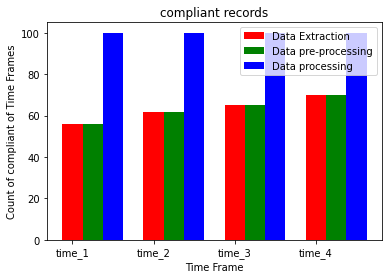

In [ ]:
processDataAbsolute([56, 62, 65, 70], [56, 62, 65, 70], [100, 100, 100, 100], "compliant records")

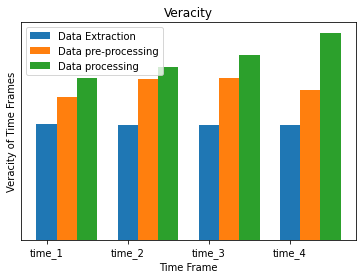

In [ ]:
before_veracity = [0.373, 0.370, 0.371, 0.370]
scale_factor = [1.23, 1.4, 1.4, 1.3]
after_pre_processing_scale_factor = [1.4, 1.5, 1.6, 1.8]

processData(before_veracity, scale_factor, after_pre_processing_scale_factor)

In [ ]:
# before_validity = [0.9956, 0.989, 0.982, 0.977]
# processData(before_validity, title)

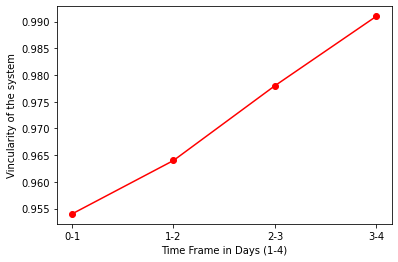

In [ ]:
before_vincularity = [0.954, 0.964, 0.978, 0.991]                     
plt.plot(["0-1", "1-2", "2-3", "3-4"], before_vincularity, 'r-o')
plt.xlabel("Time Frame in Days (1-4)")
plt.ylabel("Vincularity of the system")
plt.show()